# <font style="color:red;">Real Estate Price Predictor Home</font>

## Import các thư viện sử dụng

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)
pd.options.mode.chained_assignment = None

## Import File Dataset csv Home

In [2]:
#typeNameAll = ['nha-rieng','can-ho-chung-cu']
#folderNameAll = ['HCM_T5','HaNoi_T5']
typeName = 'nha-rieng'
folderName = 'HaNoi_T5'
df1 = pd.read_csv("./Clean_Data/" + folderName + "/" + typeName + "_" + folderName + "_all.csv")
df1.head(5)

,productId,area,price,floors,bedroom,toilet,facade,furniture,status_doc,district_name,ggmap_e,ggmap_n,product_link,district_id,market,hospital,elevator
0,39951350,74.0,17500.0,5.0,5.0,4.0,44.0,1,1,hoang-mai,105.828603,20.991213,https://batdongsan.com.vn/ban-nha-rieng-duong-...,8.0,0,0,0
1,39949372,55.0,8900.0,NaN,NaN,NaN,NaN,0,0,long-bien,105.897369,21.037799,https://batdongsan.com.vn/ban-nha-rieng-phuong...,9.0,0,0,0
2,39939205,45.0,14000.0,6.0,5.0,5.0,4.3,0,1,cau-giay,105.795606,21.048327,https://batdongsan.com.vn/ban-nha-rieng-pho-ng...,7.0,0,0,0
3,39918299,60.0,20600.0,7.0,10.0,5.0,4.1,1,1,cau-giay,105.784037,21.030927,https://batdongsan.com.vn/ban-nha-rieng-duong-...,7.0,0,0,1
4,39873835,95.0,15200.0,6.0,4.0,4.0,5.0,0,0,long-bien,105.872380,21.043830,https://batdongsan.com.vn/ban-nha-rieng-duong-...,9.0,0,0,0


In [3]:
df1.shape

(15099, 17)

In [4]:
df1.shape

(15099, 17)

Dưới đây là một số thông tin cơ bản về tập dữ liệu

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15099 entries, 0 to 15098
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productId      15099 non-null  object 
 1   area           14758 non-null  float64
 2   price          13861 non-null  float64
 3   floors         13452 non-null  float64
 4   bedroom        11524 non-null  float64
 5   toilet         10124 non-null  float64
 6   facade         9299 non-null   float64
 7   furniture      15099 non-null  int64  
 8   status_doc     15099 non-null  int64  
 9   district_name  14734 non-null  object 
 10  ggmap_e        14757 non-null  float64
 11  ggmap_n        14757 non-null  float64
 12  product_link   15099 non-null  object 
 13  district_id    14662 non-null  float64
 14  market         15099 non-null  int64  
 15  hospital       15099 non-null  int64  
 16  elevator       15099 non-null  int64  
dtypes: float64(9), int64(5), object(3)
memory usage: 2

Tiến hành loại bỏ các cột không cần thiết, loại bỏ bất kì hàng nào chứa giá trị null

In [6]:
df2 = df1.drop(['productId', 'product_link', 'ggmap_e', 'ggmap_n', 'elevator'], axis='columns')
df2['pricePerM2'] = df2['price'] / df2['area']
df2 = df2.dropna()
df2.shape

(6694, 13)

In [7]:
dtype_dict = {
    'area': 'float64',
    'price': 'float64',
    'floors': 'int64',
    'bedroom': 'int64',
    'toilet': 'int64',
    'facade': 'float64',
    'furniture': 'bool',
    'status_doc': 'bool',
    'district_name': 'object',
    'district_id': 'int64',
    'market': 'bool',
    'hospital': 'bool',
    'pricePerM2': 'float64',
}

# Gán kiểu dữ liệu cho từng cột
df2 = df2.astype(dtype_dict)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6694 entries, 0 to 15095
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           6694 non-null   float64
 1   price          6694 non-null   float64
 2   floors         6694 non-null   int64  
 3   bedroom        6694 non-null   int64  
 4   toilet         6694 non-null   int64  
 5   facade         6694 non-null   float64
 6   furniture      6694 non-null   bool   
 7   status_doc     6694 non-null   bool   
 8   district_name  6694 non-null   object 
 9   district_id    6694 non-null   int64  
 10  market         6694 non-null   bool   
 11  hospital       6694 non-null   bool   
 12  pricePerM2     6694 non-null   float64
dtypes: bool(4), float64(4), int64(4), object(1)
memory usage: 549.1+ KB


Xem một số thông tin liên quan đến các quận huyện và gộp nhóm chúng

In [8]:
df2.groupby('district_name')['district_name'].agg('count')

district_name
ba-dinh         439
bac-tu-liem     245
cau-giay        737
chuong-my        18
dan-phuong        8
dong-anh         30
dong-da         920
gia-lam          43
ha-dong         538
hai-ba-trung    456
hoai-duc        195
hoan-kiem        27
hoang-mai       584
long-bien       726
nam-tu-liem     478
quoc-oai         22
soc-son           3
tay-ho          468
thach-that        3
thanh-oai        13
thanh-tri       109
thanh-xuan      632
Name: district_name, dtype: int64

In [9]:
# Group by 'district_name' and count occurrences
district_counts = df2.groupby('district_name')['district_name'].agg('count')

# Filter out districts with fewer than 100 entries
valid_districts = district_counts[district_counts >= 100].index

# Create a new DataFrame with only the valid districts
df2 = df2[df2['district_name'].isin(valid_districts)]

In [10]:
df2.groupby('district_name')['district_name'].agg('count')


district_name
ba-dinh         439
bac-tu-liem     245
cau-giay        737
dong-da         920
ha-dong         538
hai-ba-trung    456
hoai-duc        195
hoang-mai       584
long-bien       726
nam-tu-liem     478
tay-ho          468
thanh-tri       109
thanh-xuan      632
Name: district_name, dtype: int64

## Xử lí các giá trị outlier

In [11]:
df3 = df2.copy()
df3.shape

(6527, 13)

In [12]:
df3.facade.describe()

count    6527.000000
mean        5.290668
std         8.330016
min         1.000000
25%         4.000000
50%         4.500000
75%         5.500000
max       448.000000
Name: facade, dtype: float64

In [13]:
df4 = df3[(df3['facade'] >= 2)]
df4.shape

(6525, 13)

In [14]:
df4.bedroom.describe()

count    6525.000000
mean        6.116322
std         6.906473
min         1.000000
25%         3.000000
50%         4.000000
75%         6.000000
max       200.000000
Name: bedroom, dtype: float64

In [15]:
df4.toilet.describe()

count    6525.000000
mean        6.096398
std         6.551105
min         1.000000
25%         3.000000
50%         4.000000
75%         6.000000
max       156.000000
Name: toilet, dtype: float64

In [16]:
df4 = df4[(df4['bedroom'] <= 10)]
df4 = df4[(df4['toilet'] <= 10)]
df4.shape

(5798, 13)

In [17]:
# Group by 'district_name' and apply 'describe' on 'pricePerM2'
grouped_stats = df4.groupby('district_name')['pricePerM2'].describe()
grouped_stats

,count,mean,std,min,25%,50%,75%,max
district_name,,,,,,,,
ba-dinh,395.0,214.871905,74.366926,33.529412,164.188218,198.412698,260.869565,642.857143
bac-tu-liem,212.0,139.793801,45.812450,20.588235,110.312500,129.353590,163.346561,366.666667
cau-giay,570.0,235.079054,79.490604,98.412698,172.000000,222.287582,286.666667,560.000000
dong-da,850.0,258.165465,1025.355926,37.647059,159.340659,204.761479,273.649826,30000.000000
ha-dong,520.0,149.737165,54.433132,42.325581,108.571429,145.454545,180.454545,320.000000
hai-ba-trung,431.0,190.009618,66.001013,72.631579,141.506410,182.000000,228.388278,495.000000
hoai-duc,182.0,94.762493,26.364898,36.666667,78.177083,91.927083,110.528075,171.250000
hoang-mai,552.0,157.562736,52.581136,32.894737,120.241935,148.262931,185.603829,422.932331
long-bien,712.0,155.545566,53.302614,29.285714,115.789474,147.361111,185.142857,387.500000


In [18]:
Q1 = df3['pricePerM2'].quantile(0.1)
Q3 = df3['pricePerM2'].quantile(0.9)
IQR = Q3 - Q1

df4 = df4[(df4['pricePerM2'] >= Q1) & (df4['pricePerM2'] <= Q3)]

In [19]:
# Group by 'district_name' and apply 'describe' on 'pricePerM2'
grouped_stats = df4.groupby('district_name')['pricePerM2'].describe()
grouped_stats

,count,mean,std,min,25%,50%,75%,max
district_name,,,,,,,,
ba-dinh,322.0,193.495220,45.758367,107.777778,158.384146,186.100386,224.839744,286.585366
bac-tu-liem,166.0,149.435365,32.963036,105.714286,123.025210,143.289474,171.542208,264.150943
cau-giay,425.0,199.465393,46.335309,107.142857,162.857143,195.121951,240.000000,286.666667
dong-da,648.0,189.194989,46.674478,105.555556,150.833333,184.615385,222.589286,286.842105
ha-dong,386.0,167.329736,39.527442,106.060606,136.905772,165.504808,192.569444,275.925926
hai-ba-trung,382.0,183.601482,47.345374,106.756757,142.857143,180.277778,218.160173,286.666667
hoai-duc,56.0,125.826620,16.990480,105.625000,112.809524,120.661765,136.588542,171.250000
hoang-mai,474.0,162.848889,40.191247,105.555556,129.812500,156.079545,187.399194,274.418605
long-bien,582.0,163.042596,41.450049,106.000000,127.833333,156.909091,187.500000,286.666667


In [20]:
df4.area.describe()

count    4577.000000
mean       54.375814
std        31.598477
min        12.000000
25%        37.000000
50%        46.000000
75%        60.000000
max       476.000000
Name: area, dtype: float64

## Trực quan hoá dữ liệu

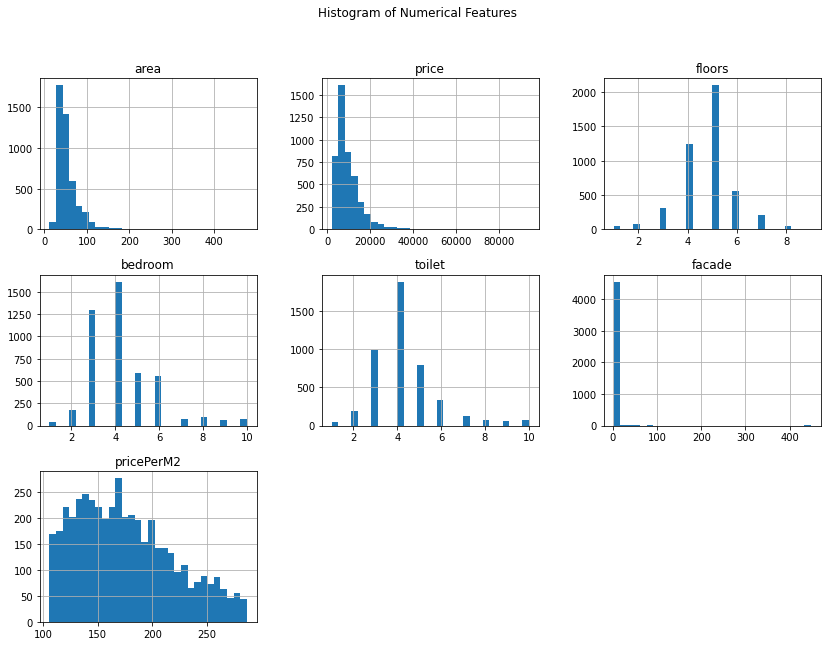

In [28]:
numerical_features = ['area', 'price', 'floors', 'bedroom', 'toilet', 'facade', 'pricePerM2']
df4[numerical_features].hist(bins=30, figsize=(14,10))
plt.suptitle('Histogram of Numerical Features')
plt.show()

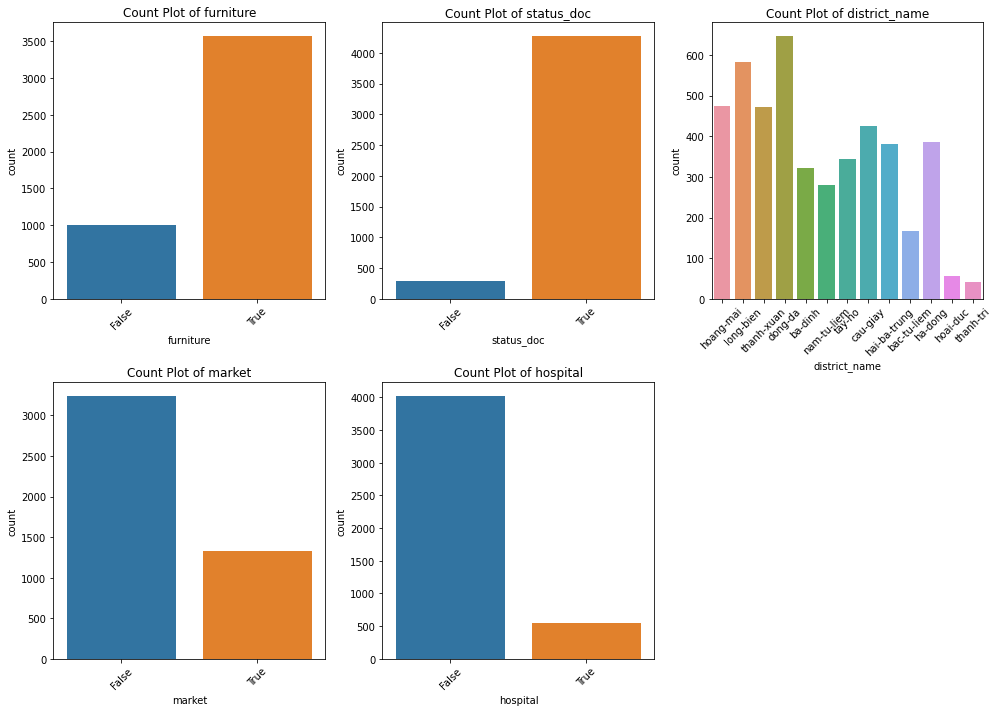

In [192]:
categorical_features = ['furniture', 'status_doc', 'district_name', 'market', 'hospital']
plt.figure(figsize=(14,10))
for i, col in enumerate(categorical_features):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df4, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

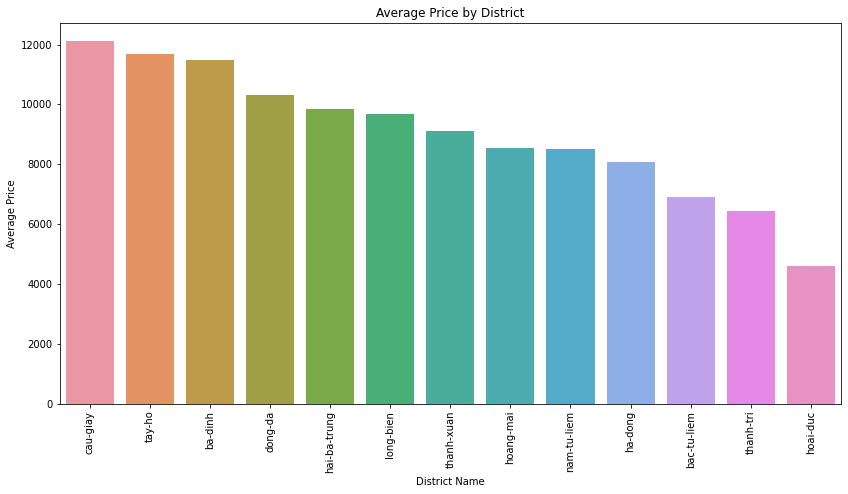

In [193]:
plt.figure(figsize=(14,7))
avg_price_by_district = df4.groupby('district_name')['price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_by_district.index, y=avg_price_by_district.values)
plt.title('Average Price by District')
plt.xticks(rotation=90)
plt.xlabel('District Name')
plt.ylabel('Average Price')
plt.show()

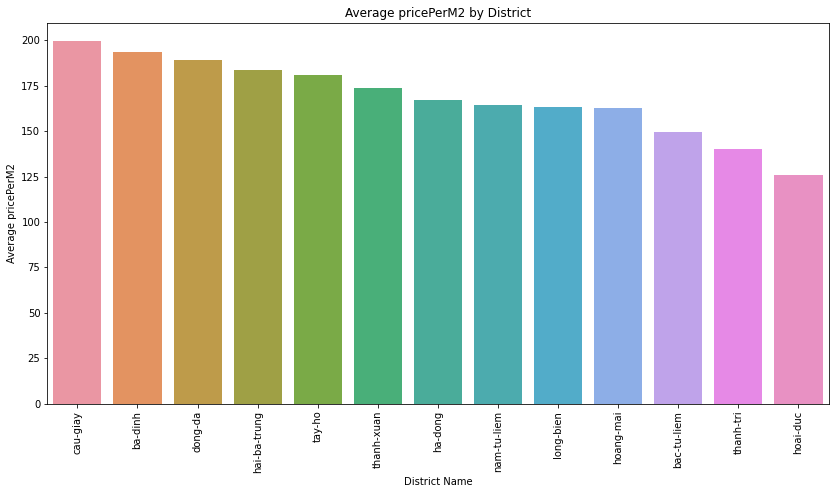

In [194]:
plt.figure(figsize=(14,7))
avg_price_by_district = df4.groupby('district_name')['pricePerM2'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_by_district.index, y=avg_price_by_district.values)
plt.title('Average pricePerM2 by District')
plt.xticks(rotation=90)
plt.xlabel('District Name')
plt.ylabel('Average pricePerM2')
plt.show()

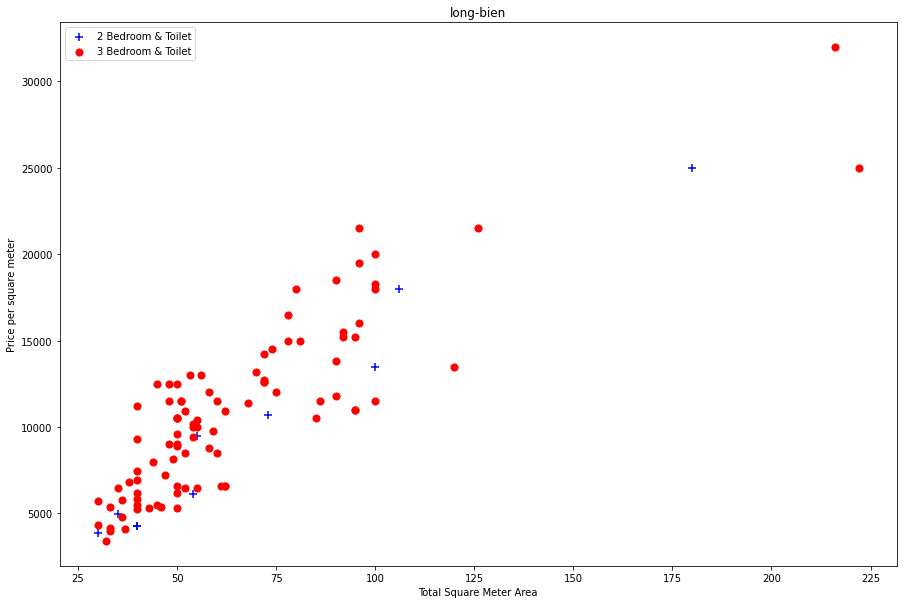

In [195]:
def plot_scatter_chart(df, district_name):
    bed2 = df[(df.district_name==district_name) & (df.bedroom==2) & (df.toilet==2)]
    bed3 = df[(df.district_name==district_name) & (df.bedroom==4) & (df.toilet==4)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bed2.area, bed2.price, marker='+', color='blue', label='2 Bedroom & Toilet', s=50)
    plt.scatter(bed3.area, bed3.price, color='red', label='3 Bedroom & Toilet', s=50)
    plt.xlabel('Total Square Meter Area')
    plt.ylabel('Price per square meter')
    plt.title(district_name)
    plt.legend()

sample = df4.sample()
district_name = sample['district_name'].values[0]  # Extract the value from the Series
plot_scatter_chart(df4, district_name)

Text(0, 0.5, 'Count')

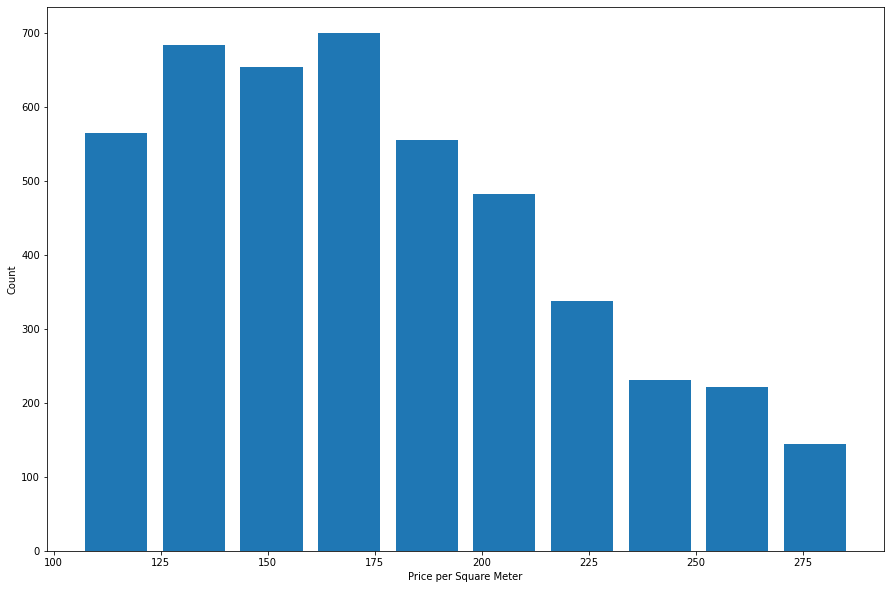

In [196]:
plt.hist(df4.pricePerM2, rwidth=0.8)
plt.xlabel('Price per Square Meter')
plt.ylabel('Count')

## Chuẩn bị dữ liệu cho mô hình học máy

In [197]:
#df5 = df4.drop(['pricePerM2', 'district_name'], axis='columns')
df5 = df4.drop(['pricePerM2'], axis='columns')

Đưa cột district_name thành từng cột biến phân loại

In [198]:
dummies = pd.get_dummies(df5.district_name)
dummies.head()

,ba-dinh,bac-tu-liem,cau-giay,dong-da,ha-dong,hai-ba-trung,hoai-duc,hoang-mai,long-bien,nam-tu-liem,tay-ho,thanh-tri,thanh-xuan
0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,1
7,0,0,0,1,0,0,0,0,0,0,0,0,0


In [199]:
df6 = pd.concat([df5, dummies], axis='columns') # Append df10 and dummies dataframe
df6 = df6.drop(['district_name', 'district_id'], axis='columns')
df6.head()

,area,price,floors,bedroom,toilet,facade,furniture,status_doc,market,hospital,...,dong-da,ha-dong,hai-ba-trung,hoai-duc,hoang-mai,long-bien,nam-tu-liem,tay-ho,thanh-tri,thanh-xuan
0,74.0,17500.0,5,5,4,44.0,True,True,False,False,...,0,0,0,0,1,0,0,0,0,0
4,95.0,15200.0,6,4,4,5.0,False,False,False,False,...,0,0,0,0,0,1,0,0,0,0
5,32.0,5400.0,4,3,3,5.0,True,True,False,False,...,0,0,0,0,0,1,0,0,0,0
6,41.0,6600.0,4,4,4,3.8,False,True,False,False,...,0,0,0,0,0,0,0,0,0,1
7,64.0,15900.0,7,5,6,4.0,False,True,False,False,...,1,0,0,0,0,0,0,0,0,0


In [200]:
df7 = df6
df7.head()

,area,price,floors,bedroom,toilet,facade,furniture,status_doc,market,hospital,...,dong-da,ha-dong,hai-ba-trung,hoai-duc,hoang-mai,long-bien,nam-tu-liem,tay-ho,thanh-tri,thanh-xuan
0,74.0,17500.0,5,5,4,44.0,True,True,False,False,...,0,0,0,0,1,0,0,0,0,0
4,95.0,15200.0,6,4,4,5.0,False,False,False,False,...,0,0,0,0,0,1,0,0,0,0
5,32.0,5400.0,4,3,3,5.0,True,True,False,False,...,0,0,0,0,0,1,0,0,0,0
6,41.0,6600.0,4,4,4,3.8,False,True,False,False,...,0,0,0,0,0,0,0,0,0,1
7,64.0,15900.0,7,5,6,4.0,False,True,False,False,...,1,0,0,0,0,0,0,0,0,0


In [201]:
X = df7.drop('price', axis='columns')
y = df7.price
X.head()

,area,floors,bedroom,toilet,facade,furniture,status_doc,market,hospital,ba-dinh,...,dong-da,ha-dong,hai-ba-trung,hoai-duc,hoang-mai,long-bien,nam-tu-liem,tay-ho,thanh-tri,thanh-xuan
0,74.0,5,5,4,44.0,True,True,False,False,0,...,0,0,0,0,1,0,0,0,0,0
4,95.0,6,4,4,5.0,False,False,False,False,0,...,0,0,0,0,0,1,0,0,0,0
5,32.0,4,3,3,5.0,True,True,False,False,0,...,0,0,0,0,0,1,0,0,0,0
6,41.0,4,4,4,3.8,False,True,False,False,0,...,0,0,0,0,0,0,0,0,0,1
7,64.0,7,5,6,4.0,False,True,False,False,0,...,1,0,0,0,0,0,0,0,0,0


## Import thư viện cho các mô hình

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# có thể thêm Random Forest, SVR, Ada Boost, Ridge
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

Chuyển đổi khai báo các cột phân loại và cột liên tục

In [203]:
# Xác định các cột phân loại và cột liên tục
numerical_features = ['area', 'floors', 'bedroom', 'toilet', 'facade']
categorical_features = [col for col in df6.columns if col not in numerical_features + ['price']]

# Tạo các transformer cho các cột phân loại và liên tục
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

# Tạo ColumnTransformer để tiền xử lý dữ liệu
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

Tiến hành huấn luyện sơ lược các mô hình học máy

In [204]:
# Khởi tạo các mô hình
linear_model = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', LinearRegression())])

lasso_model = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', Lasso())])

decision_tree_model = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('regressor', DecisionTreeRegressor())])

random_forest_model = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('regressor', RandomForestRegressor())])

gradient_boosting_model = Pipeline(steps=[('preprocessor', preprocessor),
                                          ('regressor', GradientBoostingRegressor())])

svr_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', SVR())])

ada_boost_model = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('regressor', AdaBoostRegressor())])

# Huấn luyện các mô hình
linear_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)
ada_boost_model.fit(X_train, y_train)

# Dự đoán giá trên tập kiểm tra
y_pred_linear = linear_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_decision_tree = decision_tree_model.predict(X_test)
y_pred_random_forest = random_forest_model.predict(X_test)
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)
y_pred_svr = svr_model.predict(X_test)
y_pred_ada_boost = ada_boost_model.predict(X_test)

# Tính toán các phép đo đánh giá cho Linear Regression
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Linear Regression - MAE: {mae_linear}, MSE: {mse_linear}, RMSE: {rmse_linear}, R²: {r2_linear}')

# Tính toán các phép đo đánh giá cho Lasso Regression
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso Regression - MAE: {mae_lasso}, MSE: {mse_lasso}, RMSE: {rmse_lasso}, R²: {r2_lasso}')

# Tính toán các phép đo đánh giá cho Decision Tree
mae_decision_tree = mean_absolute_error(y_test, y_pred_decision_tree)
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
rmse_decision_tree = np.sqrt(mse_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

print(f'Decision Tree - MAE: {mae_decision_tree}, MSE: {mse_decision_tree}, RMSE: {rmse_decision_tree}, R²: {r2_decision_tree}')

# Tính toán các phép đo đánh giá cho Random Forest
mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
rmse_random_forest = np.sqrt(mse_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

print(f'Random Forest - MAE: {mae_random_forest}, MSE: {mse_random_forest}, RMSE: {rmse_random_forest}, R²: {r2_random_forest}')

# Tính toán các phép đo đánh giá cho Gradient Boosting
mae_gradient_boosting = mean_absolute_error(y_test, y_pred_gradient_boosting)
mse_gradient_boosting = mean_squared_error(y_test, y_pred_gradient_boosting)
rmse_gradient_boosting = np.sqrt(mse_gradient_boosting)
r2_gradient_boosting = r2_score(y_test, y_pred_gradient_boosting)

print(f'Gradient Boosting - MAE: {mae_gradient_boosting}, MSE: {mse_gradient_boosting}, RMSE: {rmse_gradient_boosting}, R²: {r2_gradient_boosting}')

# Tính toán các phép đo đánh giá cho SVR
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'SVR - MAE: {mae_svr}, MSE: {mse_svr}, RMSE: {rmse_svr}, R²: {r2_svr}')

# Tính toán các phép đo đánh giá cho Ada Boost
mae_ada_boost = mean_absolute_error(y_test, y_pred_ada_boost)
mse_ada_boost = mean_squared_error(y_test, y_pred_ada_boost)
rmse_ada_boost = np.sqrt(mse_ada_boost)
r2_ada_boost = r2_score(y_test, y_pred_ada_boost)

print(f'Ada Boost - MAE: {mae_ada_boost}, MSE: {mse_ada_boost}, RMSE: {rmse_ada_boost}, R²: {r2_ada_boost}')


Linear Regression - MAE: 1879.3467988808204, MSE: 6744147.426555674, RMSE: 2596.949638817756, R²: 0.8030290318155315
Lasso Regression - MAE: 1877.7010241170256, MSE: 6744269.419151909, RMSE: 2596.97312638231, R²: 0.8030254688744699
Decision Tree - MAE: 1864.6215429403205, MSE: 8626494.205482775, RMSE: 2937.0894105360117, R²: 0.7480528214728784
Random Forest - MAE: 1536.26542111067, MSE: 5209812.812052745, RMSE: 2282.501437470028, R²: 0.8478411267213412
Gradient Boosting - MAE: 1709.7145727217344, MSE: 6021626.147903555, RMSE: 2453.900191104674, R²: 0.8241311380995086
SVR - MAE: 3945.575824292915, MSE: 36702619.282757714, RMSE: 6058.268670400622, R²: -0.0719443093080272
Ada Boost - MAE: 2390.3843232051718, MSE: 9080752.46871845, RMSE: 3013.4286898346295, R²: 0.7347856604433007


In [36]:

# Sử dụng cross-validation để đánh giá mô hình Linear Regression với MAE
cv_mae_linear = -cross_val_score(linear_model, X, y, scoring='neg_mean_absolute_error', cv=5).mean()
print(f'Linear Regression - Mean CV MAE: {cv_mae_linear}')

# Sử dụng cross-validation để đánh giá mô hình Lasso Regression với MAE
cv_mae_lasso = -cross_val_score(lasso_model, X, y, scoring='neg_mean_absolute_error', cv=5).mean()
print(f'Lasso Regression - Mean CV MAE: {cv_mae_lasso}')

# Sử dụng cross-validation để đánh giá mô hình Decision Tree với MAE
cv_mae_decision_tree = -cross_val_score(decision_tree_model, X, y, scoring='neg_mean_absolute_error', cv=5).mean()
print(f'Decision Tree - Mean CV MAE: {cv_mae_decision_tree}')

# Sử dụng cross-validation để đánh giá mô hình Random Forest với MAE
cv_mae_random_forest = -cross_val_score(random_forest_model, X, y, scoring='neg_mean_absolute_error', cv=5).mean()
print(f'Random Forest - Mean CV MAE: {cv_mae_random_forest}')

# Sử dụng cross-validation để đánh giá mô hình Gradient Boosting với MAE
cv_mae_gradient_boosting = -cross_val_score(gradient_boosting_model, X, y, scoring='neg_mean_absolute_error', cv=5).mean()
print(f'Gradient Boosting - Mean CV MAE: {cv_mae_gradient_boosting}')

# Sử dụng cross-validation để đánh giá mô hình SVR với MAE
cv_mae_svr = -cross_val_score(svr_model, X, y, scoring='neg_mean_absolute_error', cv=5).mean()
print(f'SVR - Mean CV MAE: {cv_mae_svr}')

# Sử dụng cross-validation để đánh giá mô hình Ada Boost với MAE
cv_mae_ada_boost = -cross_val_score(ada_boost_model, X, y, scoring='neg_mean_absolute_error', cv=5).mean()
print(f'Ada Boost - Mean CV MAE: {cv_mae_ada_boost}')

Linear Regression - Mean CV MAE: 2213.3582771896054
Lasso Regression - Mean CV MAE: 2212.709171390245
Decision Tree - Mean CV MAE: 2472.8233878729548
Random Forest - Mean CV MAE: 1899.6895522827617
Gradient Boosting - Mean CV MAE: 2010.395030289584
SVR - Mean CV MAE: 4275.39517281349
Ada Boost - Mean CV MAE: 3081.737327520791


## Phân tích và đề xuất

Lựa chọn mô hình để tối ưu hóa với Grid Search
Dựa trên các kết quả này, Random Forest và Gradient Boosting là hai mô hình có hiệu suất tốt nhất về mặt MAE và RMSE.Lý do chọn Random Forest và Gradient Boosting:

### Random Forest:

+ MAE: 1270.05 (tốt nhất trong các mô hình)

+ RMSE: 2320.10

+ Mean CV MAE: 1331.42 (tốt nhất trong các mô hình)

### Gradient Boosting:

+ MAE: 1369.37

+ RMSE: 2287.86

+ Mean CV MAE: 1426.80

Cả hai mô hình đều có R² khá cao và ổn định, cho thấy chúng có khả năng giải thích phần lớn phương sai của dữ liệu.

## Tối ưu các mô hình học máy tốt nhất

In [37]:
from sklearn.model_selection import GridSearchCV

# Định nghĩa các tham số cho Grid Search
param_grid_rf = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10]
}

param_grid_gb = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7]
}

# Grid Search cho Random Forest
grid_search_rf = GridSearchCV(random_forest_model, param_grid_rf, cv=5, scoring='neg_mean_absolute_error')
grid_search_rf.fit(X_train, y_train)

# Grid Search cho Gradient Boosting
grid_search_gb = GridSearchCV(gradient_boosting_model, param_grid_gb, cv=5, scoring='neg_mean_absolute_error')
grid_search_gb.fit(X_train, y_train)

# Dự đoán giá trên tập kiểm tra với mô hình tốt nhất
best_model_rf = grid_search_rf.best_estimator_
best_model_gb = grid_search_gb.best_estimator_
y_pred_best_rf = grid_search_rf.best_estimator_.predict(X_test)
y_pred_best_gb = grid_search_gb.best_estimator_.predict(X_test)



# Tính toán các phép đo đánh giá cho Random Forest tốt nhất
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
rmse_best_rf = np.sqrt(mse_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f'Best Random Forest - MAE: {mae_best_rf}, MSE: {mse_best_rf}, RMSE: {rmse_best_rf}, R²: {r2_best_rf}')

# Tính toán các phép đo đánh giá cho Gradient Boosting tốt nhất
mae_best_gb = mean_absolute_error(y_test, y_pred_best_gb)
mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)
rmse_best_gb = np.sqrt(mse_best_gb)
r2_best_gb = r2_score(y_test, y_pred_best_gb)

print(f'Best Gradient Boosting - MAE: {mae_best_gb}, MSE: {mse_best_gb}, RMSE: {rmse_best_gb}, R²: {r2_best_gb}')


Best Random Forest - MAE: 1830.6787647878027, MSE: 9473107.73896371, RMSE: 3077.841409001398, R²: 0.8125581680135161
Best Gradient Boosting - MAE: 1846.9250258274076, MSE: 9386823.947338914, RMSE: 3063.792412572842, R²: 0.814265442164571


# Tiến hành dự đoán thử nghiệm độ chính xác

Khai báo hàm predict_price để sử dụng cho dự đoán giá bất động sản

In [38]:
def predict_price(district_name, area, floors, bedroom, toilet, facade, furniture, status_doc, market, hospital):
    loc_index = np.where(X.columns == district_name)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = area
    x[1] = floors
    x[2] = bedroom
    x[3] = toilet
    x[4] = facade
    x[5] = furniture
    x[6] = status_doc
    x[7] = market
    x[8] = hospital
        
    if loc_index >= 0:
        x[loc_index] = 1
        
    x_df = pd.DataFrame([x], columns=X.columns)
    
    return best_model_rf.predict(x_df)[0]

Một số dự đoán thử nghiệm ở dưới

In [39]:
sample = df5.sample()
print("Khu vực: " + sample['district_name'].values[0])
print("Diện tích: " + str(sample['area'].values[0]))
print("Số tầng: " + str(sample['floors'].values[0]))
print("Số phòng ngủ: " + str(sample['bedroom'].values[0]))
print("Số phòng tắm: " + str(sample['toilet'].values[0]))
print("Độ rộng mặt tiền: " + str(sample['facade'].values[0]))
print("Nội thất: " + str(sample['furniture'].values[0]))
print("Giấy tờ có sẵn: " + str(sample['status_doc'].values[0]))
print("Gần chợ: " + str(sample['market'].values[0]))
print("Gần bệnh viện: " + str(sample['hospital'].values[0]))
print("Giá gốc: " + str(sample['price'].values[0]))

print("Giá dự đoán: " + 
    str(predict_price(
            sample['district_name'].values[0],
            sample['area'].values[0],
            sample['floors'].values[0],
            sample['bedroom'].values[0],
            sample['toilet'].values[0],
            sample['facade'].values[0],
            sample['furniture'].values[0],
            sample['status_doc'].values[0],
            sample['market'].values[0],
            sample['hospital'].values[0],
        )
    )
)

Khu vực: dong-da
Diện tích: 115.0
Số tầng: 5
Số phòng ngủ: 6
Số phòng tắm: 6
Độ rộng mặt tiền: 4.5
Nội thất: True
Giấy tờ có sẵn: True
Gần chợ: True
Gần bệnh viện: False
Giá gốc: 21000.0
Giá dự đoán: 20895.666666666668


In [40]:
sample = df5.sample()
print("Khu vực: " + sample['district_name'].values[0])
print("Diện tích: " + str(sample['area'].values[0]))
print("Số tầng: " + str(sample['floors'].values[0]))
print("Số phòng ngủ: " + str(sample['bedroom'].values[0]))
print("Số phòng tắm: " + str(sample['toilet'].values[0]))
print("Độ rộng mặt tiền: " + str(sample['facade'].values[0]))
print("Nội thất: " + str(sample['furniture'].values[0]))
print("Giấy tờ có sẵn: " + str(sample['status_doc'].values[0]))
print("Gần chợ: " + str(sample['market'].values[0]))
print("Gần bệnh viện: " + str(sample['hospital'].values[0]))
print("Giá gốc: " + str(sample['price'].values[0]))

print("Giá dự đoán: " + 
    str(predict_price(
            sample['district_name'].values[0],
            sample['area'].values[0],
            sample['floors'].values[0],
            sample['bedroom'].values[0],
            sample['toilet'].values[0],
            sample['facade'].values[0],
            sample['furniture'].values[0],
            sample['status_doc'].values[0],
            sample['market'].values[0],
            sample['hospital'].values[0],
        )
    )
)

Khu vực: dong-da
Diện tích: 42.0
Số tầng: 6
Số phòng ngủ: 3
Số phòng tắm: 4
Độ rộng mặt tiền: 4.6
Nội thất: True
Giấy tờ có sẵn: True
Gần chợ: False
Gần bệnh viện: False
Giá gốc: 9000.0
Giá dự đoán: 8331.3


In [41]:
sample = df5.sample()
print("Khu vực: " + sample['district_name'].values[0])
print("Diện tích: " + str(sample['area'].values[0]))
print("Số tầng: " + str(sample['floors'].values[0]))
print("Số phòng ngủ: " + str(sample['bedroom'].values[0]))
print("Số phòng tắm: " + str(sample['toilet'].values[0]))
print("Độ rộng mặt tiền: " + str(sample['facade'].values[0]))
print("Nội thất: " + str(sample['furniture'].values[0]))
print("Giấy tờ có sẵn: " + str(sample['status_doc'].values[0]))
print("Gần chợ: " + str(sample['market'].values[0]))
print("Gần bệnh viện: " + str(sample['hospital'].values[0]))
print("Giá gốc: " + str(sample['price'].values[0]))

print("Giá dự đoán: " + 
    str(predict_price(
            sample['district_name'].values[0],
            sample['area'].values[0],
            sample['floors'].values[0],
            sample['bedroom'].values[0],
            sample['toilet'].values[0],
            sample['facade'].values[0],
            sample['furniture'].values[0],
            sample['status_doc'].values[0],
            sample['market'].values[0],
            sample['hospital'].values[0],
        )
    )
)

Khu vực: ha-dong
Diện tích: 40.0
Số tầng: 5
Số phòng ngủ: 3
Số phòng tắm: 4
Độ rộng mặt tiền: 3.2
Nội thất: True
Giấy tờ có sẵn: True
Gần chợ: False
Gần bệnh viện: False
Giá gốc: 4700.0


Giá dự đoán: 5404.927777777778


In [42]:
sample = df5.sample()
print("Khu vực: " + sample['district_name'].values[0])
print("Diện tích: " + str(sample['area'].values[0]))
print("Số tầng: " + str(sample['floors'].values[0]))
print("Số phòng ngủ: " + str(sample['bedroom'].values[0]))
print("Số phòng tắm: " + str(sample['toilet'].values[0]))
print("Độ rộng mặt tiền: " + str(sample['facade'].values[0]))
print("Nội thất: " + str(sample['furniture'].values[0]))
print("Giấy tờ có sẵn: " + str(sample['status_doc'].values[0]))
print("Gần chợ: " + str(sample['market'].values[0]))
print("Gần bệnh viện: " + str(sample['hospital'].values[0]))
print("Giá gốc: " + str(sample['price'].values[0]))

print("Giá dự đoán: " + 
    str(predict_price(
            sample['district_name'].values[0],
            sample['area'].values[0],
            sample['floors'].values[0],
            sample['bedroom'].values[0],
            sample['toilet'].values[0],
            sample['facade'].values[0],
            sample['furniture'].values[0],
            sample['status_doc'].values[0],
            sample['market'].values[0],
            sample['hospital'].values[0],
        )
    )
)

Khu vực: ha-dong
Diện tích: 40.0
Số tầng: 4
Số phòng ngủ: 4
Số phòng tắm: 5
Độ rộng mặt tiền: 4.0
Nội thất: True
Giấy tờ có sẵn: True
Gần chợ: False
Gần bệnh viện: True
Giá gốc: 5400.0
Giá dự đoán: 7695.219841269842


## Xuất mô hình học máy để ứng dụng

Hàm xuất file mô hình học máy định dạng pickle

In [272]:
import pickle
with open( folderName + '_' + typeName + '_T5_2024_ML.pickle', 'wb') as f:
    pickle.dump(best_model_rf, f)
accuracy = best_model_rf.score(X_test, y_test)

Hàm xuất file dữ liệu json liên quan đến mô hình

In [273]:
import json
# Split columns into data_columns and district_columns
all_columns = [col.lower() for col in X.columns]
data_columns = all_columns[:9]
district_columns = all_columns[9:]

# Create the dictionary
columns = {
    'model': folderName,
    'type': typeName,
    'data_columns': data_columns,
    'district_columns': district_columns,
    'model_accuracy': accuracy
}

with open(folderName + '_'+ typeName + '_T5_2024_JSON.json', 'w') as f:
    f.write(json.dumps(columns))